In [53]:
from pathlib import Path

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [3]:
pwd

'/home/tfelipelli/code/ninamcunha/amooora'

In [4]:
# loading the dataset
ok = pd.read_csv("raw_data/okcupid_profiles.csv")

In [5]:
ok.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')

In [6]:
ok.shape

(59946, 31)

In [7]:
# dropping essay and last_online columns
ok = ok.drop(columns=['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'last_online'])

In [8]:
ok.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'location', 'offspring', 'pets', 'religion', 'sign', 'smokes',
       'speaks'],
      dtype='object')

In [9]:
ok.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,location,offspring,pets,religion,sign,smokes,speaks
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (..."
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++"
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)"
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english


In [10]:
# summary of the dataset
ok.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  location     59946 non-null  object 
 14  offspring    24385 non-null  object 
 15  pets         40025 non-null  object 
 16  religion     39720 non-null  object 
 17  sign         48890 non-null  object 
 18  smokes       54434 non-null  object 
 19  spea

In [11]:
# statistical summary of numerical features
ok.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [12]:
# unique values in each column
ok.nunique()

age              54
status            5
sex               2
orientation       3
body_type        12
diet             18
drinks            6
drugs             3
education        32
ethnicity       217
height           60
income           13
job              21
location        199
offspring        15
pets             15
religion         45
sign             48
smokes            5
speaks         7647
dtype: int64

In [13]:
# categorical columns
okcat = ok.select_dtypes(include=['object'])
okcat.columns

Index(['status', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs',
       'education', 'ethnicity', 'job', 'location', 'offspring', 'pets',
       'religion', 'sign', 'smokes', 'speaks'],
      dtype='object')

In [14]:
okcat.sort_values(by="orientation")

,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,job,location,offspring,pets,religion,sign,smokes,speaks
12513,single,f,bisexual,average,strictly anything,socially,sometimes,working on college/university,white,other,"san francisco, california","doesn't have kids, and doesn't want any",dislikes dogs and likes cats,atheism and very serious about it,libra but it doesn&rsquo;t matter,sometimes,"english (fluently), spanish (poorly)"
12124,single,f,bisexual,average,mostly anything,often,sometimes,graduated from college/university,white,computer / hardware / software,"san francisco, california","doesn't have kids, but might want them",likes dogs and dislikes cats,other and laughing about it,aries but it doesn&rsquo;t matter,when drinking,english (fluently)
56951,available,f,bisexual,athletic,NaN,socially,never,dropped out of college/university,white,artistic / musical / writer,"san francisco, california",doesn't want kids,NaN,atheism,virgo,no,english
12118,single,f,bisexual,overweight,NaN,not at all,never,graduated from two-year college,white,construction / craftsmanship,"oakland, california",NaN,likes dogs and has cats,other and very serious about it,scorpio and it&rsquo;s fun to think about,no,english (fluently)
3458,available,m,bisexual,fit,mostly vegetarian,socially,NaN,NaN,white,NaN,"oakland, california",NaN,likes dogs and has cats,NaN,cancer and it&rsquo;s fun to think about,yes,english
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21560,single,f,straight,NaN,NaN,socially,NaN,graduated from masters program,NaN,education / academia,"san francisco, california",NaN,NaN,NaN,NaN,NaN,"english, french (poorly)"
21561,single,f,straight,fit,NaN,socially,NaN,graduated from college/university,NaN,science / tech / engineering,"oakland, california",NaN,likes dogs and likes cats,NaN,aries,NaN,"english (fluently), spanish (poorly), german (..."
21562,single,f,straight,curvy,mostly anything,desperately,sometimes,working on law school,NaN,student,"san francisco, california",doesn't have kids,has dogs and likes cats,NaN,NaN,when drinking,"english (fluently), french (poorly), farsi (fl..."
21551,single,f,straight,full figured,mostly other,rarely,never,NaN,white,medicine / health,"san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,other and somewhat serious about it,capricorn and it&rsquo;s fun to think about,no,english


In [15]:
# numerical columns
oknum = ok.select_dtypes(include=['int64', 'float64'])
oknum.columns

Index(['age', 'height', 'income'], dtype='object')

In [16]:
oknum.sort_values(by='age', ascending=False).head()

,age,height,income
2512,110,67.0,-1
25324,109,95.0,-1
38708,69,64.0,-1
10486,69,67.0,-1
57005,69,63.0,-1


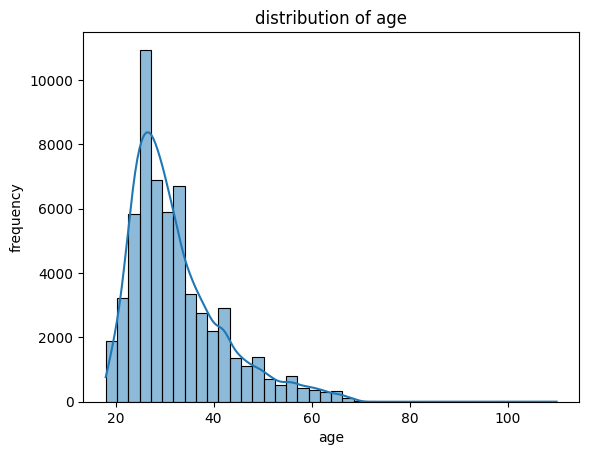

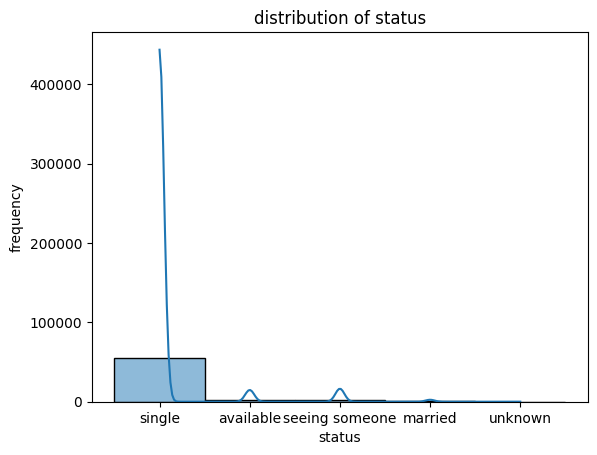

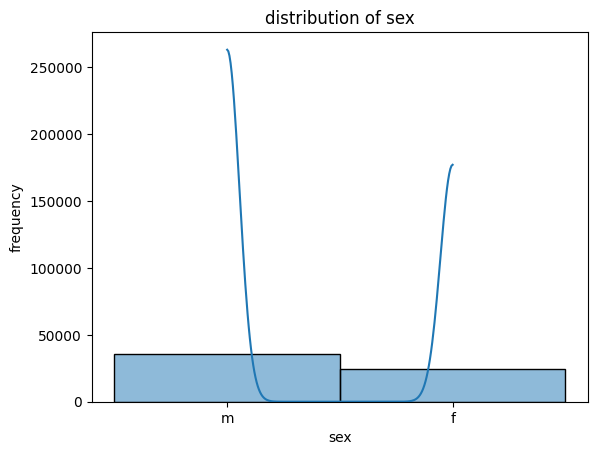

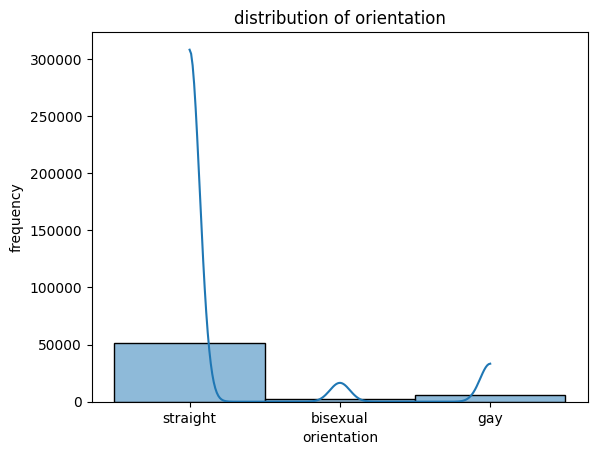

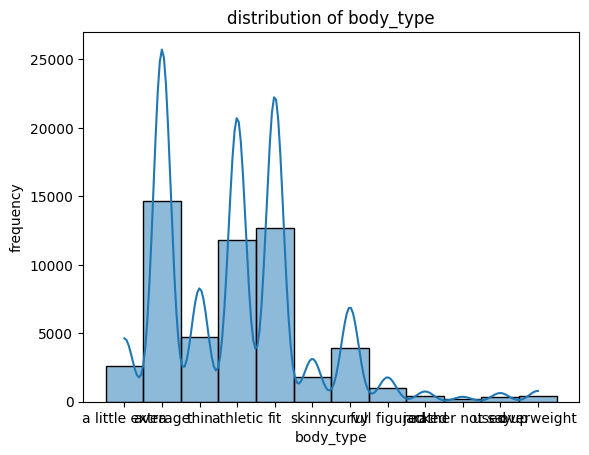

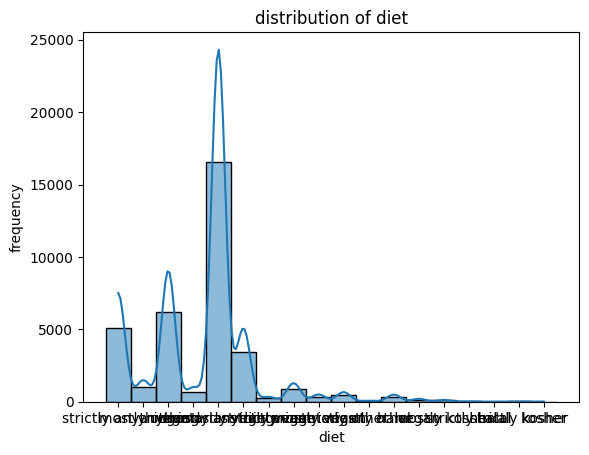

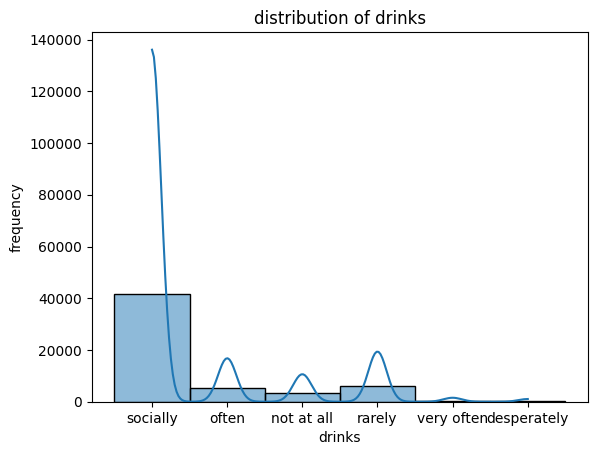

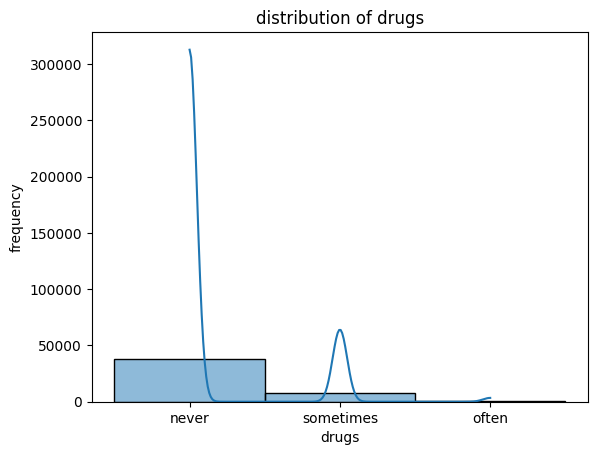

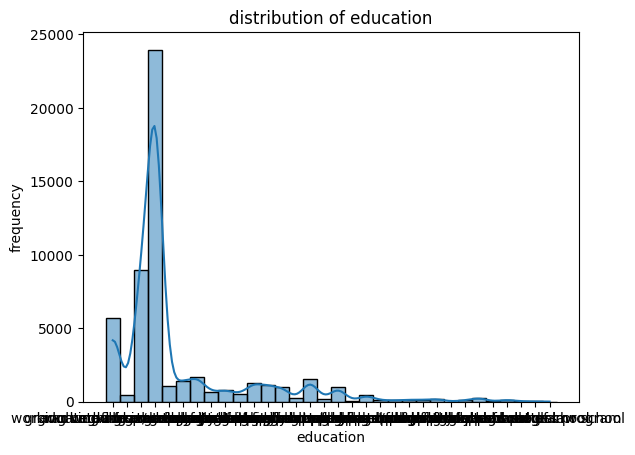

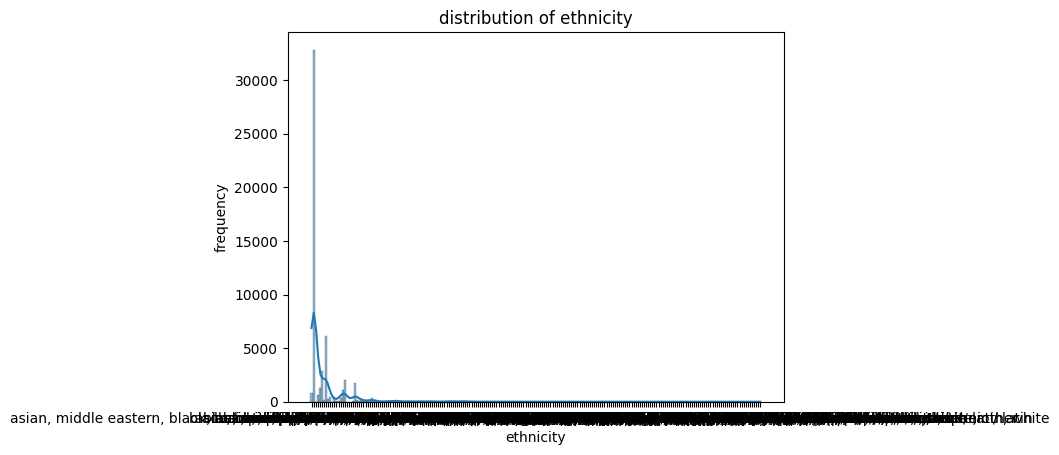

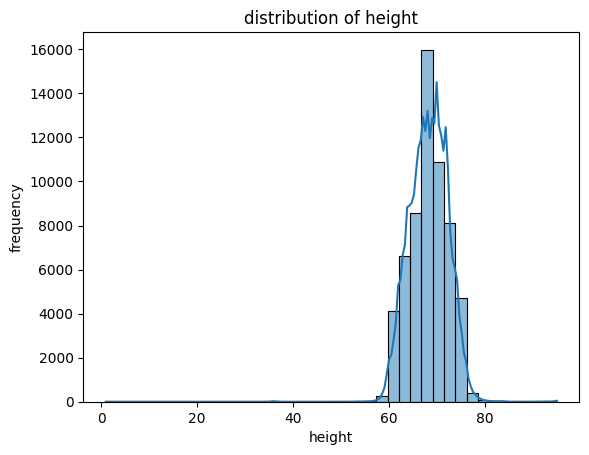

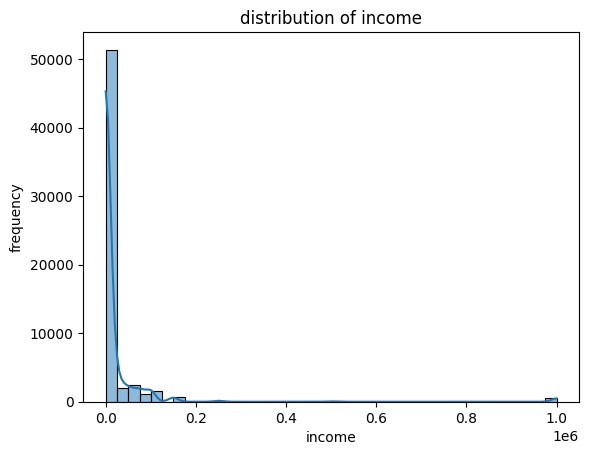

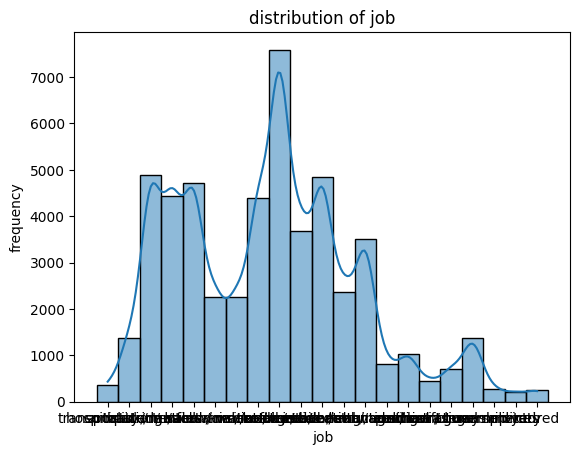

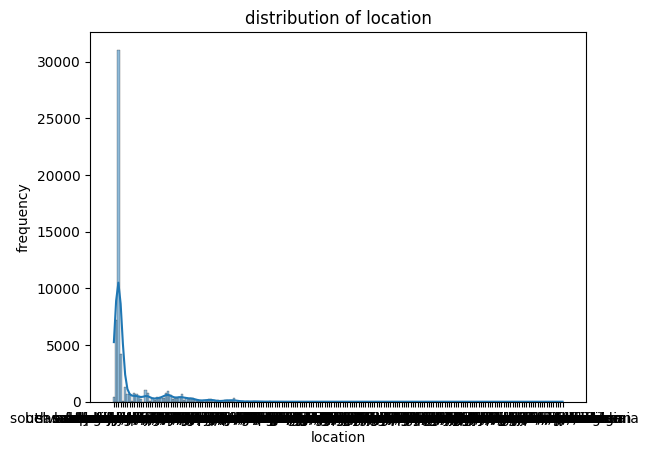

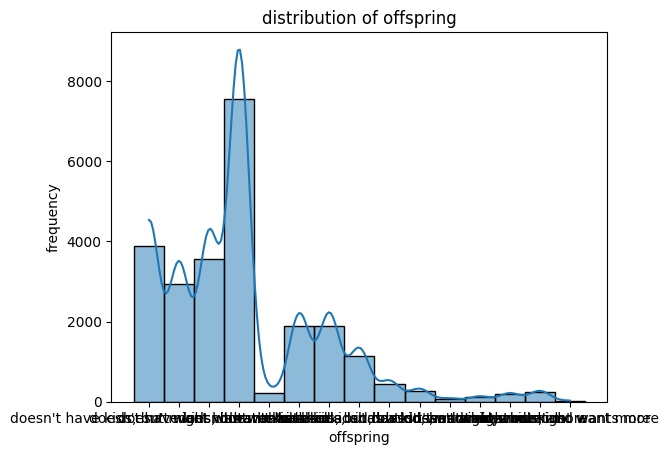

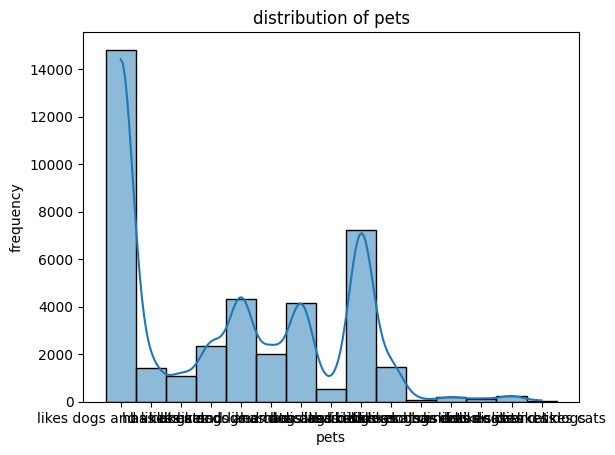

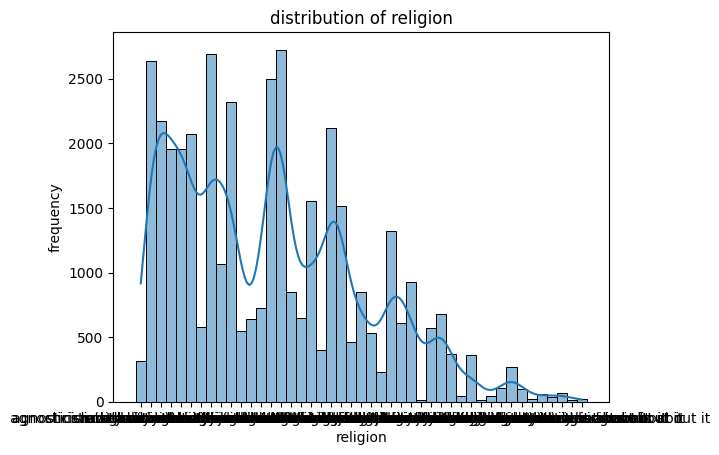

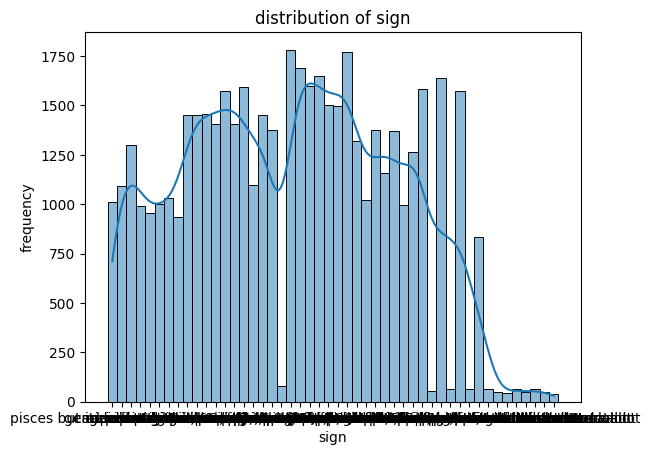

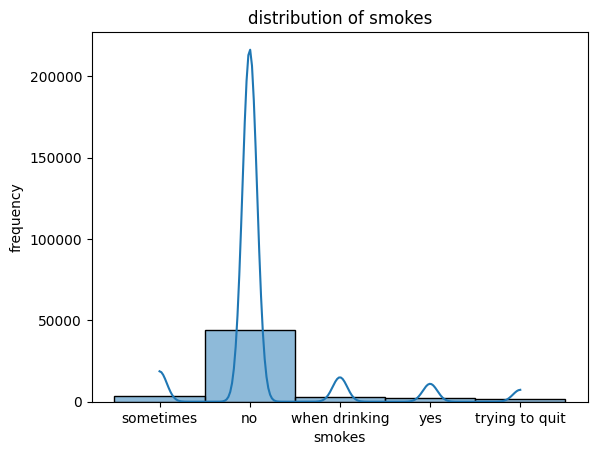

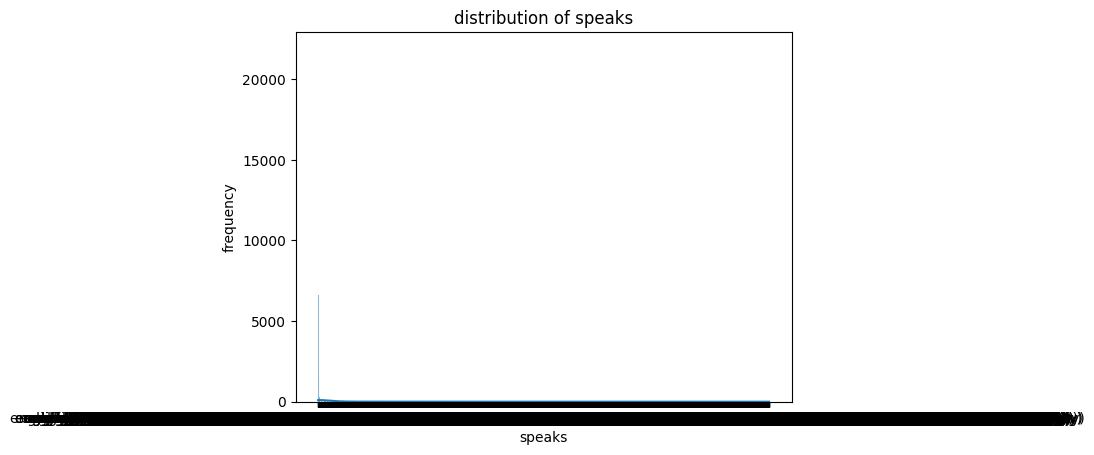

In [17]:
for feature in ok.columns:
    sns.histplot(ok[feature], bins=40, kde=True)
    plt.title(f'distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.show()

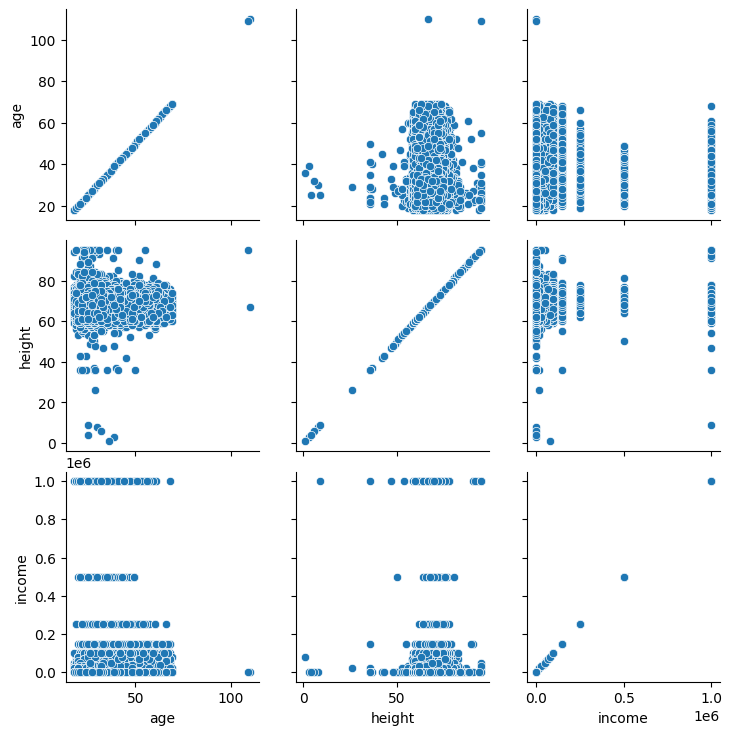

In [18]:
g = sns.PairGrid(oknum)
g.map(sns.scatterplot)

## missing data

In [19]:
# % of missing values in each column
round(ok.isnull().sum().sort_values(ascending=False)/len(ok), 2)

offspring      0.59
diet           0.41
religion       0.34
pets           0.33
drugs          0.23
sign           0.18
job            0.14
education      0.11
ethnicity      0.09
smokes         0.09
body_type      0.09
drinks         0.05
speaks         0.00
height         0.00
status         0.00
age            0.00
orientation    0.00
sex            0.00
income         0.00
location       0.00
dtype: float64

## decide what to do for each column with missing values...
Investigate missing values in each column then choose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using `SimpleImputer` from Scikit-Learn
3. Preserve the NaNs and replace them with meaningful values

Make changes effective in the dataframe using the chosen method.

### check out values in each column

In [20]:
for feature in ok.columns:
    print(f'{feature}: {ok[feature].unique()}')

age: [ 22  35  38  23  29  32  31  24  37  28  30  39  33  26  27  20  25  40
  36  21  34  43  46  41  42  45  18  55  50  59  44  48  54  51  62  52
  19  58  66  53  63  47  49  61  60  57  56  65  64  68 110  69  67 109]
status: ['single' 'available' 'seeing someone' 'married' 'unknown']
sex: ['m' 'f']
orientation: ['straight' 'bisexual' 'gay']
body_type: ['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']
diet: ['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']
drinks: ['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
drugs: ['never' 'sometimes' nan 'often']
education: ['working on college/university' 'working on space camp'
 'graduated from masters 

### `offspring`

In [21]:
# unique values and their count
ok.offspring.value_counts(dropna=False)

offspring
NaN                                        35561
doesn't have kids                           7560
doesn't have kids, but might want them      3875
doesn't have kids, but wants them           3565
doesn't want kids                           2927
has kids                                    1883
has a kid                                   1881
doesn't have kids, and doesn't want any     1132
has kids, but doesn't want more              442
has a kid, but doesn't want more             275
has a kid, and might want more               231
wants kids                                   225
might want kids                              182
has kids, and might want more                115
has a kid, and wants more                     71
has kids, and wants more                      21
Name: count, dtype: int64

In [22]:
# replacing NaN with "NotDisclosed"
# ok.offspring.replace(np.nan, "NotDisclosed", inplace=True)
ok.loc[ok.offspring.isna(),"offspring"] = "NotDisclosed"

In [43]:
ok["has_kids"] = ok.offspring.str.contains("has")

In [ ]:
ok.offspring.str.contains("want") & ok.offspring.str.contains("need")

0        False
1        False
2        False
3         True
4        False
         ...  
59941    False
59942    False
59943    False
59944    False
59945    False
Name: offspring, Length: 59946, dtype: bool

In [69]:
ok["wants_kids"] = not[ok.offspring.str.contains("doesn't want")]

In [67]:
ok.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,location,offspring,pets,religion,sign,smokes,speaks,offspring_na,has_kids,wants_kids
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,False,False,False
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",False,False,False
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"san francisco, california",NotDisclosed,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++",True,False,False
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",False,False,False
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,"san francisco, california",NotDisclosed,likes dogs and likes cats,NaN,aquarius,no,english,True,False,False


### `diet`

In [14]:
# unique values and their count
ok.diet.value_counts(dropna=False)

diet
NaN                    24395
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: count, dtype: int64

In [15]:
# replacing NaN with "NotDiet"
ok.loc[ok.diet.isna(),"diet"] = "NoDiet"

In [ ]:
diet na
diet type -> anything, vegetarian, vegan, other (kosher, halal)

### `religion`

In [16]:
# unique values and their count
ok.religion.value_counts(dropna=False)

religion
NaN                                           20226
agnosticism                                    2724
other                                          2691
agnosticism but not too serious about it       2636
agnosticism and laughing about it              2496
catholicism but not too serious about it       2318
atheism                                        2175
other and laughing about it                    2119
atheism and laughing about it                  2074
christianity                                   1957
christianity but not too serious about it      1952
other but not too serious about it             1554
judaism but not too serious about it           1517
atheism but not too serious about it           1318
catholicism                                    1064
christianity and somewhat serious about it      927
atheism and somewhat serious about it           848
other and somewhat serious about it             846
catholicism and laughing about it               726
jud

In [17]:
# replacing NaN with "NotReligion"
ok.loc[ok.religion.isna(),"religion"] = "NoReligion"

In [ ]:
religion na
religion type -> anything, agnosticism, atheism, buddhism, catholicism, christianity, hinduism, islam, judaism, other
religion serious -> empty, not too much, somewhat, very, laughing

### `pets`

In [18]:
# unique values and their count
ok.pets.value_counts(dropna=False)

pets
NaN                                19921
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: count, dtype: int64

In [19]:
# replacing NaN with "NotPets"
ok.loc[ok.pets.isna(),"pets"] = "NoPets"

### `drugs`

In [20]:
# unique values and their count
ok.drugs.value_counts(dropna=False)

drugs
never        37724
NaN          14080
sometimes     7732
often          410
Name: count, dtype: int64

In [21]:
# replacing NaN with "NotDrugs"  
ok.loc[ok.drugs.isna(),"drugs"] = "NoDrugs"

### `sign`

In [22]:
# unique values and their count
ok.sign.value_counts(dropna=False)

sign
NaN                                              11056
gemini and it&rsquo;s fun to think about          1782
scorpio and it&rsquo;s fun to think about         1772
leo and it&rsquo;s fun to think about             1692
libra and it&rsquo;s fun to think about           1649
taurus and it&rsquo;s fun to think about          1640
cancer and it&rsquo;s fun to think about          1597
pisces and it&rsquo;s fun to think about          1592
sagittarius and it&rsquo;s fun to think about     1583
virgo and it&rsquo;s fun to think about           1574
aries and it&rsquo;s fun to think about           1573
aquarius and it&rsquo;s fun to think about        1503
virgo but it doesn&rsquo;t matter                 1497
leo but it doesn&rsquo;t matter                   1457
cancer but it doesn&rsquo;t matter                1454
gemini but it doesn&rsquo;t matter                1453
taurus but it doesn&rsquo;t matter                1450
aquarius but it doesn&rsquo;t matter              1408
libra

In [23]:
# replacing NaN with "NotDisclosed"
ok.loc[ok.sign.isna(),"sign"] = "NotDisclosed"

### `job`

In [24]:
# unique values and their count
ok.job.value_counts(dropna=False)

job
NaN                                  8198
other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: count, dtype: int64

In [25]:
# replacing NaN with "NotDisclosed"
ok.loc[ok.job.isna(),"job"] = "NotDisclosed"

### `education`

In [26]:
# unique values and their count
ok.education.value_counts(dropna=False)

education
graduated from college/university    23959
graduated from masters program        8961
NaN                                   6628
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
d

In [27]:
# replacing NaN with "NotDisclosed"
ok.loc[ok.education.isna(),"education"] = "NotDisclosed"

### `ethnicity`

In [28]:
# unique values and their count
ok.ethnicity.value_counts(dropna=False)

ethnicity
white                                                                               32831
asian                                                                                6134
NaN                                                                                  5680
hispanic / latin                                                                     2823
black                                                                                2008
                                                                                    ...  
asian, black, pacific islander, hispanic / latin, white                                 1
asian, native american, indian, pacific islander, hispanic / latin, white, other        1
asian, middle eastern, black, pacific islander, hispanic / latin                        1
asian, black, pacific islander, white, other                                            1
asian, black, indian                                                                    1


In [29]:
ok.ethnicity.unique()

array(['asian, white', 'white', nan, 'asian, black, other',
       'white, other', 'hispanic / latin, white', 'hispanic / latin',
       'pacific islander, white', 'asian', 'black, white',
       'pacific islander', 'asian, native american',
       'asian, pacific islander', 'black, native american, white',
       'middle eastern, other', 'native american, white', 'indian',
       'black', 'black, native american, hispanic / latin, other',
       'black, native american, hispanic / latin',
       'asian, black, pacific islander',
       'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other',
       'other', 'hispanic / latin, other', 'asian, black',
       'middle eastern, white', 'native american, white, other',
       'black, native american', 'black, white, other',
       'hispanic / latin, white, other', 'middle eastern', 'black, other',
       'native american, hispanic / latin, white', 'black, indian',
       'indian, white, othe

In [30]:
# replacing NaN with "NotDisclosed"
ok.loc[ok.ethnicity.isna(),"ethnicity"] = "NotDisclosed"

### `smokes`

In [31]:
# unique values and their count
ok.smokes.value_counts(dropna=False)

smokes
no                43896
NaN                5512
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: count, dtype: int64

In [32]:
# replacing NaN with "NotDisclosed"
ok.loc[ok.smokes.isna(),"smokes"] = "NotDisclosed"

### `body type`

In [33]:
# unique values and their count
ok.body_type.value_counts(dropna=False)

body_type
average           14652
fit               12711
athletic          11819
NaN                5296
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: count, dtype: int64

In [34]:
# replacing NaN with "RatherNotSay"
ok.loc[ok.body_type.isna(),"body_type"] = "RatherNotSay"

In [35]:
# replacing same text with spaces with "RatherNotSay"
ok.loc[ok.body_type == "rather not say", "body_type"] = "RatherNotSay"

### `drinks`

In [36]:
# unique values and their count
ok.drinks.value_counts(dropna=False)

drinks
socially       41780
rarely          5957
often           5164
not at all      3267
NaN             2985
very often       471
desperately      322
Name: count, dtype: int64

In [37]:
# replacing NaN with "NotDisclosed"
ok.loc[ok.drinks.isna(),"drinks"] = "NotDisclosed"

### `speaks`

In [38]:
# unique values and their count
ok.speaks.value_counts(dropna=False)

speaks
english                                                                                              21828
english (fluently)                                                                                    6628
english (fluently), spanish (poorly)                                                                  2059
english (fluently), spanish (okay)                                                                    1917
english (fluently), spanish (fluently)                                                                1288
                                                                                                     ...  
english (fluently), polish (fluently), french (poorly), hungarian (poorly), italian (poorly)             1
english, spanish (fluently), hindi (okay), french (poorly)                                               1
english (okay), spanish (okay), hebrew (okay)                                                            1
english (fluently), slovenian 

In [39]:
# replacing NaN with "english"
ok.loc[ok.speaks.isna(),"speaks"] = "english"

## checking i no longer have missing values

In [40]:
#NaN percentage for each column
round(ok.isnull().sum().sort_values(ascending=False)/len(ok),2)

height         0.0
status         0.0
sex            0.0
orientation    0.0
age            0.0
body_type      0.0
diet           0.0
drugs          0.0
drinks         0.0
education      0.0
ethnicity      0.0
income         0.0
job            0.0
last_online    0.0
location       0.0
offspring      0.0
pets           0.0
religion       0.0
sign           0.0
smokes         0.0
speaks         0.0
dtype: float64

## writing csv

In [42]:
ok.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (..."
2,38,available,m,straight,thin,anything,socially,NoDrugs,graduated from masters program,NotDisclosed,...,-1,NotDisclosed,2012-06-27-09-10,"san francisco, california",NoKids,has cats,NoReligion,pisces but it doesn&rsquo;t matter,no,"english, french, c++"
3,23,single,m,straight,thin,vegetarian,socially,NoDrugs,working on college/university,white,...,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NoReligion,pisces,no,"english, german (poorly)"
4,29,single,m,straight,athletic,NoDiet,socially,never,graduated from college/university,"asian, black, other",...,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NoKids,likes dogs and likes cats,NoReligion,aquarius,no,english


In [44]:
filepath = Path('raw_data/okcupid_nomissing.csv') 
filepath.parent.mkdir(parents=True, exist_ok=True)

In [45]:
ok.to_csv(filepath) 

## option number 2 -> imputing value

In [41]:
'''
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") 
# Instantiate a SimpleImputer object with strategy of choice

imputer.fit(data[['RoofSurface']]) 
# Call the "fit" method on the object

data['RoofSurface'] = imputer.transform(data[['RoofSurface']]) 
# Call the "transform" method on the object
'''

'\nfrom sklearn.impute import SimpleImputer\n\nimputer = SimpleImputer(strategy="median") \n# Instantiate a SimpleImputer object with strategy of choice\n\nimputer.fit(data[[\'RoofSurface\']]) \n# Call the "fit" method on the object\n\ndata[\'RoofSurface\'] = imputer.transform(data[[\'RoofSurface\']]) \n# Call the "transform" method on the object\n'

## Scaling